In [1]:
import random
import math
import pandas as pd
from sklearn.preprocessing import StandardScaler
from mpl_toolkits import mplot3d
#%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def overlap_percent(xcoord, ind_m, ind_c, minl, maxl, binn):
    ##==========histogram overlapped region==================
    #========================================================
    e=np.histogram(xcoord[ind_m], bins= binn, range= [minl,maxl])
    g=np.histogram(xcoord[ind_c], bins= binn, range= [minl,maxl])

    mhist=np.array(e[0],dtype=int)  ;mrange=mhist.repeat(2)
    chist=np.array(g[0],dtype=int)*percent  ; crange=chist.repeat(2)
    chist1=np.array(g[1],dtype=float)  ; binrange1=chist1.repeat(2)[1:-1]

    mval=np.zeros(binn) ;   mval1=np.zeros(binn)
    frac1=np.zeros(binn) ;   mean_bin1=np.zeros(binn)
    maxbin=np.zeros(binn)

    for kj in range(len(mhist)):
        frac1[kj]+=min(mhist[kj],chist[kj])
        maxbin[kj]=max(mhist[kj],chist[kj])

    newlist1 = [xxs for xxs in frac1 if math.isnan(xxs) == False]

    over_p1=(sum(newlist1)/(sum(mhist)))
    maxbin=max(maxbin)
    return over_p1, maxbin, binrange1, mrange, crange

def find_dividing_point(rotated, rang, bin_count, ind_all, ind_m, ind_c, axis, axis1):
    mean_frac=np.zeros(len(rang))
    dif=np.zeros(len(rang))
    merger=np.zeros(len(rang)) ;   relax=np.zeros(len(rang))
    m_frac=np.zeros(len(rang)) ;   c_frac=np.zeros(len(rang))

    median_merger=np.median(rotated[ind_m, axis])
    median_merger1=np.median(rotated[ind_m, axis1])
    median_control=np.median(rotated[ind_c, axis])
    median_control1=np.median(rotated[ind_c, axis1])

    ##======================================================
    k=0
    percent= float(np.shape(ind_m)[0])/np.shape(ind_c)[0]
    rotated1=rotated[ind_all,:]
    ##======================================================
    for j in rang:    
        tota = np.where((rotated[:,axis] >= j) & (rotated[:,axis] < j+binn*2))
        aa1=np.shape(tota)[1]

        if median_merger >= median_control :
            tot = np.where(rotated1[:,axis] >= j)
            tot1 = np.where(rotated1[:,axis] < j)
        else : 
            tot = np.where(rotated1[:,axis] <= j)  
            tot1 = np.where(rotated1[:,axis] > j)

        cc=(rotated1[tot])
        ac=np.where(cc[:,2] == 1)
        bc=np.where(cc[:,2] == 10)
        merger[k]=np.shape(ac)[1]
        if (aa1>=bin_count) :
            m_frac[k]=(merger[k])/(np.shape(ac)[1]+np.shape(bc)[1]*percent)
        else :
            m_frac[k]= float('nan')

        cc1=(rotated1[tot1])
        ac1=np.where(cc1[:,2] == 1)
        bc1=np.where(cc1[:,2] == 10)
        relax[k]=np.shape(bc1)[1]

        if (aa1>=bin_count) :
            c_frac[k]=(relax[k]*percent)/(np.shape(ac1)[1]+np.shape(bc1)[1]*percent)
        else :
            c_frac[k]= float('nan')

        mean_frac[k]=((m_frac[k]+c_frac[k])/2)
        np.nan_to_num(mean_frac, copy=False)
        k=k+1

    nearz=np.where(abs(rang) == min(abs(rang)))[0]                
    minvalp=nearz
    return minvalp, m_frac, c_frac, mean_frac, median_merger, median_control

In [109]:
dvp=find_dividing_point(rotated, rang, bin_count, ind_all, ind_m, ind_c, axis, axis1)
minvalp=dvp[0] ; m_frac=dvp[1]; c_frac=dvp[2]
print(minvalp, m_frac, c_frac)

[12] [0.5        0.49832776 0.49832776 0.4966443  0.49494949 0.49322034
 0.48713551 0.48180243 0.47864769 0.48863636 0.52719665 0.61282051
 0.72542373 0.87155963 0.98265896 1.         1.         1.
 1.         1.         1.         1.         1.                nan] [       nan 0.         0.         0.         0.         0.1
 0.05882353 0.04347826 0.18421053 0.41666667 0.60655738 0.70952381
 0.71803279 0.71204188 0.69555035 0.65789474 0.61983471 0.57803468
 0.55045872 0.52447552 0.51369863 0.50505051 0.50167224        nan]


/tmp/ipykernel_349678/378304752.py:70: RuntimeWarning: invalid value encountered in scalar divide
  c_frac[k]=(relax[k]*percent)/(np.shape(ac1)[1]+np.shape(bc1)[1]*percent)


['m12', 'd_off']


C:\Users\hyowon\AppData\Local\Temp/ipykernel_131392/2498729008.py:67: RuntimeWarning: invalid value encountered in double_scalars
  c_frac[k]=(relax[k]*percent)/(np.shape(ac1)[1]+np.shape(bc1)[1]*percent)


last repeat results of angle : 10, ['m12', 'd_off']
mean: 0.5872763, std: 0.1805953, coeff_x_axis: 0.984808*x+-0.173648*y
 dividing point:0.025742, success rate: 0.851648 , overlap percentage: 33.333333, dividing criteria: 1.518315 


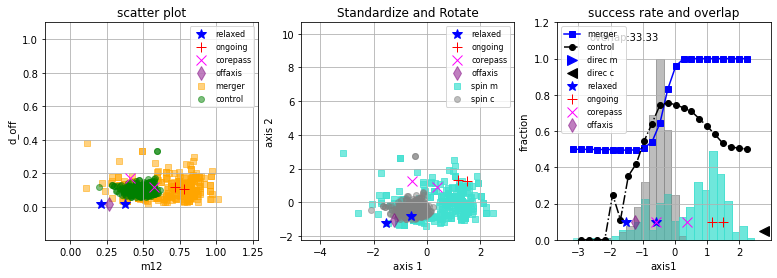

dividing point :  0.01 {+ 0.05}_{-0.05}
success rate :  0.82 {+ 0.01}_{-0.01}
overlap_pecentage : 36.07 {+ 1.41}_{-1.26}


C:\Users\hyowon\AppData\Local\Temp/ipykernel_131392/2498729008.py:67: RuntimeWarning: invalid value encountered in double_scalars
  c_frac[k]=(relax[k]*percent)/(np.shape(ac1)[1]+np.shape(bc1)[1]*percent)


last repeat results of angle : 20, ['m12', 'd_off']
mean: 0.5872763, std: 0.1805953, coeff_x_axis: 0.939693*x+-0.342020*y
 dividing point:0.112855, success rate: 0.843249 , overlap percentage: 33.333333, dividing criteria: 1.509916 


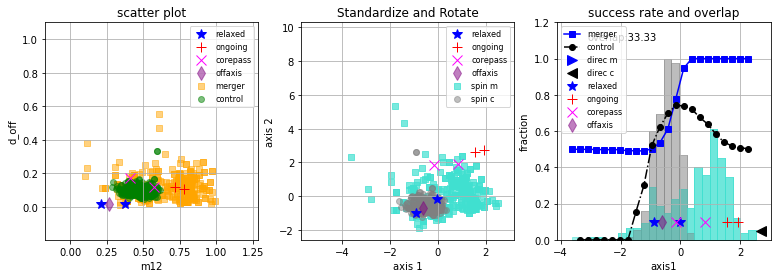

dividing point : -0.01 {+ 0.05}_{-0.06}
success rate :  0.79 {+ 0.01}_{-0.02}
overlap_pecentage : 36.57 {+ 1.24}_{-1.43}


C:\Users\hyowon\AppData\Local\Temp/ipykernel_131392/2498729008.py:67: RuntimeWarning: invalid value encountered in double_scalars
  c_frac[k]=(relax[k]*percent)/(np.shape(ac1)[1]+np.shape(bc1)[1]*percent)


last repeat results of angle : 30, ['m12', 'd_off']
mean: 0.5872763, std: 0.1805953, coeff_x_axis: 0.866025*x+-0.500000*y
 dividing point:-0.096763, success rate: 0.705021 , overlap percentage: 40.000000, dividing criteria: 1.305021 


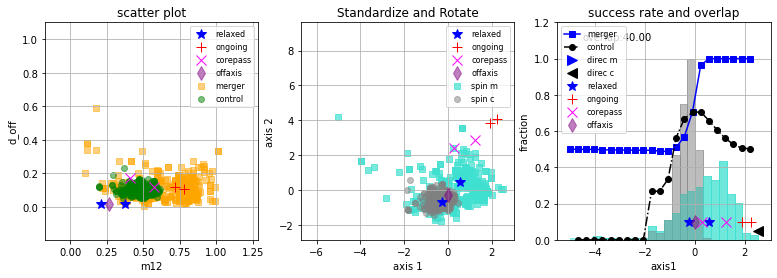

dividing point : -0.00 {+ 0.06}_{-0.05}
success rate :  0.76 {+ 0.02}_{-0.02}
overlap_pecentage : 37.88 {+ 1.54}_{-1.46}


C:\Users\hyowon\AppData\Local\Temp/ipykernel_131392/2498729008.py:67: RuntimeWarning: invalid value encountered in double_scalars
  c_frac[k]=(relax[k]*percent)/(np.shape(ac1)[1]+np.shape(bc1)[1]*percent)


last repeat results of angle : 40, ['m12', 'd_off']
mean: 0.5872763, std: 0.1805953, coeff_x_axis: 0.766044*x+-0.642788*y
 dividing point:-0.092893, success rate: 0.693885 , overlap percentage: 35.666667, dividing criteria: 1.337218 


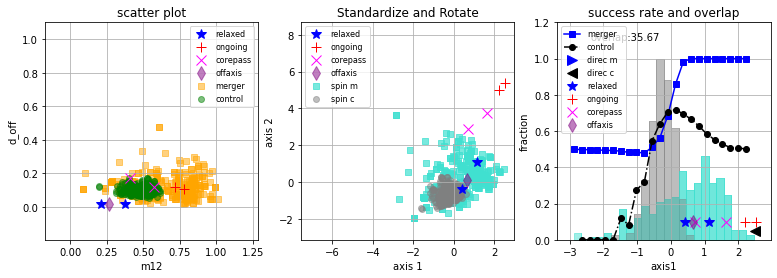

dividing point :  0.02 {+ 0.04}_{-0.05}
success rate :  0.72 {+ 0.02}_{-0.02}
overlap_pecentage : 40.63 {+ 1.63}_{-1.37}


C:\Users\hyowon\AppData\Local\Temp/ipykernel_131392/2498729008.py:67: RuntimeWarning: invalid value encountered in double_scalars
  c_frac[k]=(relax[k]*percent)/(np.shape(ac1)[1]+np.shape(bc1)[1]*percent)


last repeat results of angle : 50, ['m12', 'd_off']
mean: 0.5872763, std: 0.1805953, coeff_x_axis: 0.642788*x+-0.766044*y
 dividing point:-0.019509, success rate: 0.667928 , overlap percentage: 41.333333, dividing criteria: 1.254595 


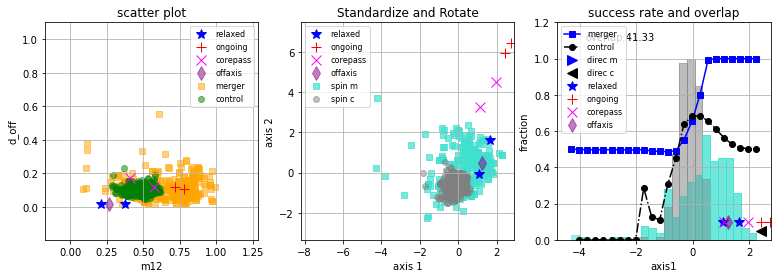

dividing point :  0.00 {+ 0.07}_{-0.06}
success rate :  0.66 {+ 0.02}_{-0.02}
overlap_pecentage : 44.26 {+ 1.60}_{-1.74}


C:\Users\hyowon\AppData\Local\Temp/ipykernel_131392/2498729008.py:67: RuntimeWarning: invalid value encountered in double_scalars
  c_frac[k]=(relax[k]*percent)/(np.shape(ac1)[1]+np.shape(bc1)[1]*percent)


last repeat results of angle : 60, ['m12', 'd_off']
mean: 0.5872763, std: 0.1805953, coeff_x_axis: 0.500000*x+-0.866025*y
 dividing point:-0.025392, success rate: 0.568182 , overlap percentage: 49.000000, dividing criteria: 1.078182 


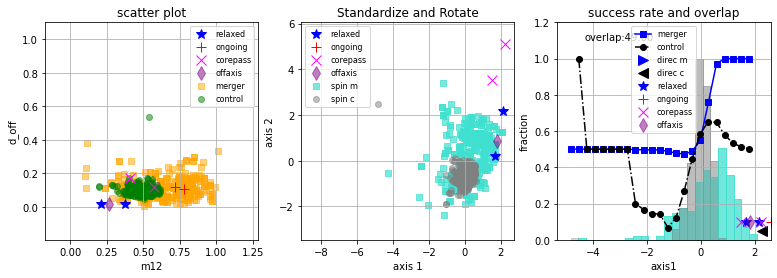

dividing point :  0.00 {+ 0.03}_{-0.07}
success rate :  0.60 {+ 0.02}_{-0.02}
overlap_pecentage : 48.64 {+ 1.64}_{-1.70}


C:\Users\hyowon\AppData\Local\Temp/ipykernel_131392/2498729008.py:67: RuntimeWarning: invalid value encountered in double_scalars
  c_frac[k]=(relax[k]*percent)/(np.shape(ac1)[1]+np.shape(bc1)[1]*percent)


last repeat results of angle : 70, ['m12', 'd_off']
mean: 0.5872763, std: 0.1805953, coeff_x_axis: 0.342020*x+-0.939693*y
 dividing point:-0.083479, success rate: 0.492341 , overlap percentage: 55.000000, dividing criteria: 0.942341 


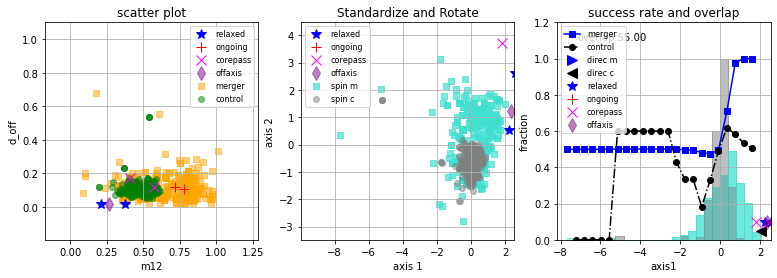

dividing point :  0.01 {+ 0.07}_{-0.06}
success rate :  0.52 {+ 0.02}_{-0.02}
overlap_pecentage : 53.00 {+ 1.67}_{-1.66}


C:\Users\hyowon\AppData\Local\Temp/ipykernel_131392/2498729008.py:67: RuntimeWarning: invalid value encountered in double_scalars
  c_frac[k]=(relax[k]*percent)/(np.shape(ac1)[1]+np.shape(bc1)[1]*percent)


last repeat results of angle : 80, ['m12', 'd_off']
mean: 0.5872763, std: 0.1805953, coeff_x_axis: 0.173648*x+-0.984808*y
 dividing point:-0.153106, success rate: 0.367890 , overlap percentage: 56.666667, dividing criteria: 0.801224 


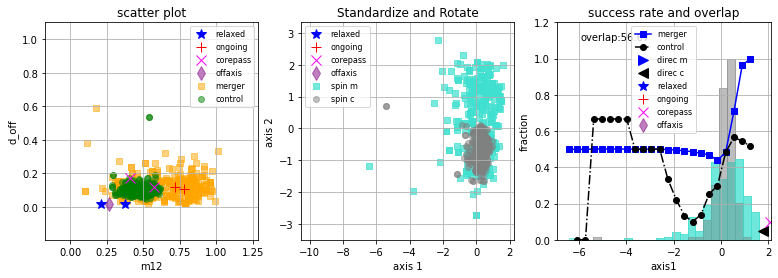

dividing point : -0.01 {+ 0.04}_{-0.04}
success rate :  0.45 {+ 0.03}_{-0.01}
overlap_pecentage : 56.21 {+ 1.88}_{-1.79}


C:\Users\hyowon\AppData\Local\Temp/ipykernel_131392/2498729008.py:67: RuntimeWarning: invalid value encountered in double_scalars
  c_frac[k]=(relax[k]*percent)/(np.shape(ac1)[1]+np.shape(bc1)[1]*percent)


last repeat results of angle : 90, ['m12', 'd_off']
mean: 0.5872763, std: 0.1805953, coeff_x_axis: 0.000000*x+-1.000000*y
 dividing point:0.010693, success rate: 0.646213 , overlap percentage: 53.333333, dividing criteria: 1.112880 


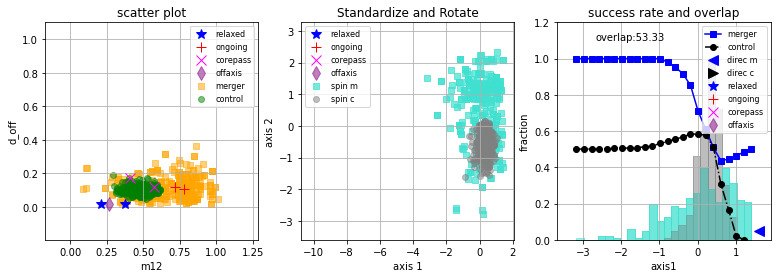

dividing point : -0.01 {+ 0.06}_{-0.07}
success rate :  0.65 {+ 0.01}_{-0.02}
overlap_pecentage : 57.38 {+ 1.71}_{-1.62}


C:\Users\hyowon\AppData\Local\Temp/ipykernel_131392/2498729008.py:67: RuntimeWarning: invalid value encountered in double_scalars
  c_frac[k]=(relax[k]*percent)/(np.shape(ac1)[1]+np.shape(bc1)[1]*percent)


last repeat results of angle : 100, ['m12', 'd_off']
mean: 0.5872763, std: 0.1805953, coeff_x_axis: -0.173648*x+-0.984808*y
 dividing point:0.038799, success rate: 0.740942 , overlap percentage: 58.000000, dividing criteria: 1.160942 


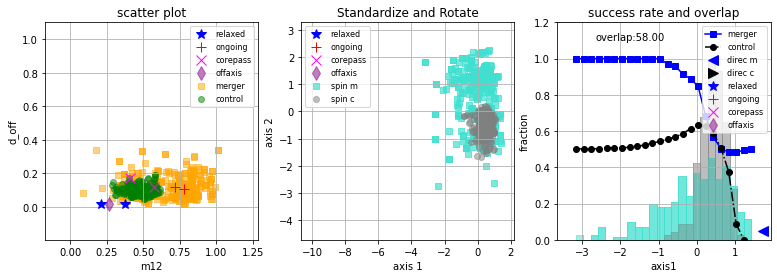

dividing point : -0.00 {+ 0.05}_{-0.08}
success rate :  0.71 {+ 0.01}_{-0.01}
overlap_pecentage : 57.64 {+ 1.64}_{-1.69}


C:\Users\hyowon\AppData\Local\Temp/ipykernel_131392/2498729008.py:67: RuntimeWarning: invalid value encountered in double_scalars
  c_frac[k]=(relax[k]*percent)/(np.shape(ac1)[1]+np.shape(bc1)[1]*percent)


last repeat results of angle : 110, ['m12', 'd_off']
mean: 0.5872763, std: 0.1805953, coeff_x_axis: -0.342020*x+-0.939693*y
 dividing point:-0.075577, success rate: 0.785243 , overlap percentage: 50.666667, dividing criteria: 1.278577 


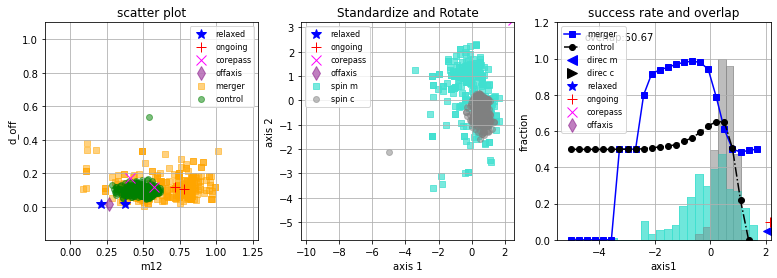

dividing point :  0.00 {+ 0.04}_{-0.05}
success rate :  0.76 {+ 0.01}_{-0.01}
overlap_pecentage : 52.36 {+ 1.69}_{-1.64}


C:\Users\hyowon\AppData\Local\Temp/ipykernel_131392/2498729008.py:67: RuntimeWarning: invalid value encountered in double_scalars
  c_frac[k]=(relax[k]*percent)/(np.shape(ac1)[1]+np.shape(bc1)[1]*percent)


last repeat results of angle : 120, ['m12', 'd_off']
mean: 0.5872763, std: 0.1805953, coeff_x_axis: -0.500000*x+-0.866025*y
 dividing point:0.101131, success rate: 0.745014 , overlap percentage: 51.333333, dividing criteria: 1.231681 


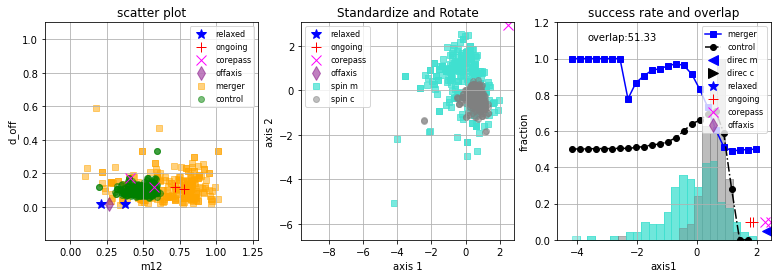

dividing point :  0.01 {+ 0.04}_{-0.05}
success rate :  0.79 {+ 0.01}_{-0.01}
overlap_pecentage : 46.37 {+ 1.37}_{-1.63}


C:\Users\hyowon\AppData\Local\Temp/ipykernel_131392/2498729008.py:67: RuntimeWarning: invalid value encountered in double_scalars
  c_frac[k]=(relax[k]*percent)/(np.shape(ac1)[1]+np.shape(bc1)[1]*percent)


last repeat results of angle : 130, ['m12', 'd_off']
mean: 0.5872763, std: 0.1805953, coeff_x_axis: -0.642788*x+-0.766044*y
 dividing point:0.040606, success rate: 0.804236 , overlap percentage: 43.000000, dividing criteria: 1.374236 


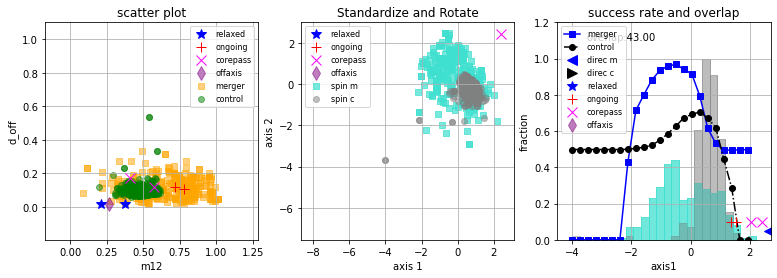

dividing point : -0.01 {+ 0.06}_{-0.06}
success rate :  0.82 {+ 0.01}_{-0.01}
overlap_pecentage : 41.59 {+ 1.59}_{-1.41}


C:\Users\hyowon\AppData\Local\Temp/ipykernel_131392/2498729008.py:67: RuntimeWarning: invalid value encountered in double_scalars
  c_frac[k]=(relax[k]*percent)/(np.shape(ac1)[1]+np.shape(bc1)[1]*percent)


last repeat results of angle : 140, ['m12', 'd_off']
mean: 0.5872763, std: 0.1805953, coeff_x_axis: -0.766044*x+-0.642788*y
 dividing point:0.046779, success rate: 0.840659 , overlap percentage: 34.333333, dividing criteria: 1.497326 


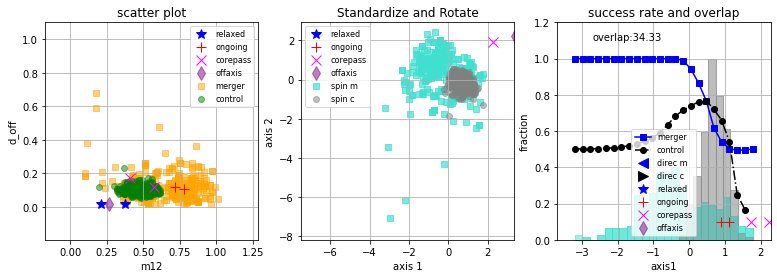

dividing point :  0.01 {+ 0.05}_{-0.04}
success rate :  0.83 {+ 0.01}_{-0.01}
overlap_pecentage : 38.50 {+ 1.50}_{-1.50}


C:\Users\hyowon\AppData\Local\Temp/ipykernel_131392/2498729008.py:67: RuntimeWarning: invalid value encountered in double_scalars
  c_frac[k]=(relax[k]*percent)/(np.shape(ac1)[1]+np.shape(bc1)[1]*percent)


last repeat results of angle : 150, ['m12', 'd_off']
mean: 0.5872763, std: 0.1805953, coeff_x_axis: -0.866025*x+-0.500000*y
 dividing point:0.055067, success rate: 0.841250 , overlap percentage: 37.000000, dividing criteria: 1.471250 


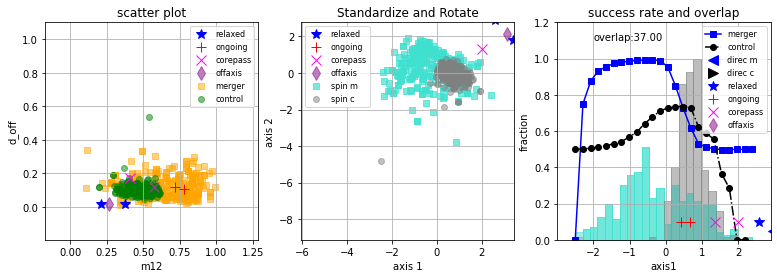

dividing point : -0.02 {+ 0.05}_{-0.04}
success rate :  0.85 {+ 0.00}_{-0.01}
overlap_pecentage : 36.72 {+ 1.39}_{-1.28}


C:\Users\hyowon\AppData\Local\Temp/ipykernel_131392/2498729008.py:67: RuntimeWarning: invalid value encountered in double_scalars
  c_frac[k]=(relax[k]*percent)/(np.shape(ac1)[1]+np.shape(bc1)[1]*percent)


last repeat results of angle : 160, ['m12', 'd_off']
mean: 0.5872763, std: 0.1805953, coeff_x_axis: -0.939693*x+-0.342020*y
 dividing point:-0.028805, success rate: 0.835048 , overlap percentage: 40.333333, dividing criteria: 1.431714 


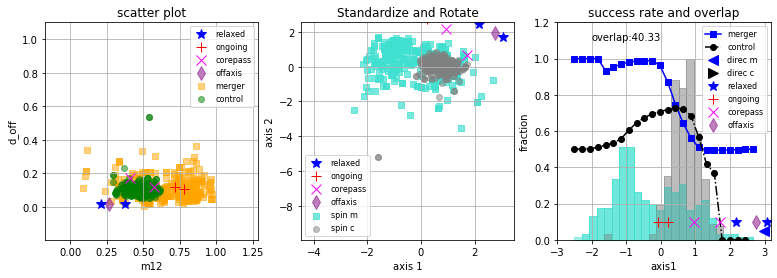

dividing point : -0.02 {+ 0.04}_{-0.05}
success rate :  0.85 {+ 0.01}_{-0.01}
overlap_pecentage : 35.75 {+ 1.41}_{-1.25}


C:\Users\hyowon\AppData\Local\Temp/ipykernel_131392/2498729008.py:67: RuntimeWarning: invalid value encountered in double_scalars
  c_frac[k]=(relax[k]*percent)/(np.shape(ac1)[1]+np.shape(bc1)[1]*percent)


last repeat results of angle : 170, ['m12', 'd_off']
mean: 0.5872763, std: 0.1805953, coeff_x_axis: -0.984808*x+-0.173648*y
 dividing point:0.086283, success rate: 0.838369 , overlap percentage: 31.333333, dividing criteria: 1.525035 


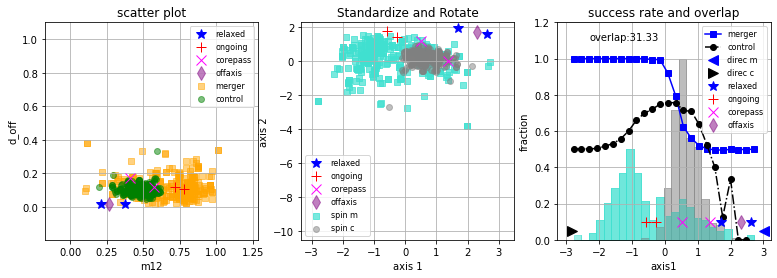

dividing point : -0.00 {+ 0.06}_{-0.06}
success rate :  0.84 {+ 0.01}_{-0.01}
overlap_pecentage : 35.24 {+ 1.24}_{-1.42}


C:\Users\hyowon\AppData\Local\Temp/ipykernel_131392/2498729008.py:67: RuntimeWarning: invalid value encountered in double_scalars
  c_frac[k]=(relax[k]*percent)/(np.shape(ac1)[1]+np.shape(bc1)[1]*percent)


last repeat results of angle : 180, ['m12', 'd_off']
mean: 0.5872763, std: 0.1805953, coeff_x_axis: -1.000000*x+-0.000000*y
 dividing point:0.109624, success rate: 0.813995 , overlap percentage: 33.000000, dividing criteria: 1.483995 


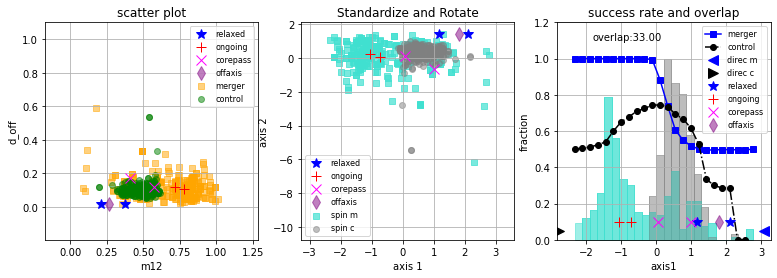

dividing point :  0.04 {+ 0.04}_{-0.07}
success rate :  0.83 {+ 0.01}_{-0.01}
overlap_pecentage : 35.12 {+ 1.45}_{-1.22}


In [4]:
#2D rotation -- tsi 1
#--------------------------------------------------------------------------------------------
f=open('2d_rotation_result.txt', 'w+')
print('ind1 ind2 angle  mean  std  coeff_x1  coeff_y1  div_point  success_r  overlap' , file=f)
#=============read obs data===================
df1 = pd.read_csv('../2ndproj/test_obs.txt', \
                    sep='\s+', usecols=['cl_idn',  'sparsity', 'm12', 'doff', 'xi', 'fsub']) 

cl_idn=df1.loc[:, 'cl_idn'].values ; ob_doff=df1.loc[:, 'doff'].values
ob_m12=df1.loc[:, 'm12'].values ; ob_ksi=df1.loc[:, 'xi'].values

ind_r=np.where((cl_idn == 'A963') | (cl_idn == 'A2261') )[0]
ind_u0=np.where((cl_idn == 'A2061') | (cl_idn == 'A2255'))[0]
ind_u1=np.where((cl_idn == 'A2034') | (cl_idn == 'A2443'))[0]
ind_u2=np.where((cl_idn == 'A115'))[0]

#=============read sim data===================
df = pd.read_csv('../Nclusterdata/test_sim.txt', \
                sep='\s+', usecols=['tsi','sparsity', 'm12', 'fsubms', 'ksi', 'd_off']) 

features=[['sparsity', 'm12'], ['sparsity','fsubms'], ['sparsity','ksi'], ['sparsity','d_off'],\
['m12','fsubms'], ['m12','d_off'], ['m12','ksi'], ['fsubms', 'ksi'],['fsubms','d_off'],['ksi', 'd_off']]
features2=[['sparsity', r'$\Delta$m12'], ['sparsity','f_m*'], ['sparsity',r'$\xi$'], ['sparsity','d_off'],\
[r'$\Delta$m12','f_m*'],  ['r$\Delta$m12','d_off'], [r'$\Delta$m12',r'$\xi$'],['f_m*', r'$\xi$'],['f_m*','d_off'],[r'$\xi$', 'd_off']]

#-----------------------basic variables--------------------------------------------------------
axis=0 ; axis1=1; min_op=np.zeros(2) ; 
over_p=100 ; success_r=0 ; dv_criteria=0 #pre-paratemers
repeat=10000 #repeating for error estimation
#--------------------------------------------------------------------------------------------
for ii in range(5,6,1): #['m12','d_off']
    #--------------------------------------------------------------------------------------------
    #blank array for saving results from repetition
    point=np.zeros(repeat) ; success_rate=np.zeros(repeat)   ; overlap_p=np.zeros(repeat)
    #--------------------------------------------------------------------------------------------
    print(features[ii])
    #xx = df.loc[:, indicater].values
    xx1 = df.loc[:, features[ii]].values
    scaler = StandardScaler()
    xx = scaler.fit_transform(xx1)
    mean=scaler.mean_ ; std=scaler.scale_ 
    
    x = xx[:,0] ;  y = xx[:,1] 
    
    tsi = df.loc[:,['tsi']].values # time since merger

    mer=np.where(tsi == 1)[0] #recent merger
    con=np.where(tsi == 10)[0] #relaxed

    #==================calculate spin angle==================
    for angles in range(10,190,10):
        #----------rotation---------------
        sin=np.sin(np.radians(angles))
        cos=np.cos(np.radians(angles))
        xcoord=(x)*cos - (y)*sin
        ycoord=(x)*sin + (y)*cos
        #-------------------------------------------------------------
        if angles != -1 :
            xcoord1=np.array([xcoord]) ; ycoord1=np.array([ycoord])
            newcoord=np.concatenate((xcoord1.T,ycoord1.T), axis=1)
            rotated=np.concatenate((newcoord,tsi), axis=1)

            ind_m1=np.where(rotated[:, 2] == 1)[0]
            ind_c1=np.where(rotated[:, 2] == 10)[0] 
            #print(np.shape(ind_m),np.shape(ind_c))
            #----------------add bootstrap sampling------------------
            cnt=0
            while cnt < repeat : 
                cnt=cnt+1
                ind_m = random.choices(ind_m1.tolist(), k=300) #k number is for random selection of data
                ind_c = random.choices(ind_c1.tolist(), k=300)
                ind_all=np.concatenate((ind_m, ind_c), axis=0)
                #----------------------base for histogram----------------------------------
                minl=min(rotated[ind_all,axis]) ;  maxl=max(rotated[ind_all,axis])
                binn=int((np.sqrt(np.shape(ind_m)[0]+np.shape(ind_c)[0]))) #number of bins
                rang=np.linspace(minl, maxl, binn) #range of data for bins
                bin_count=5 #minimum limitation number for cluster counts within a bin
                percent= float(np.shape(ind_m)[0])/np.shape(ind_c)[0]
                #################functions######################
                dvp=find_dividing_point(rotated, rang, bin_count, ind_all, ind_m, ind_c, axis, axis1)
                minvalp=dvp[0] ; m_frac=dvp[1]; c_frac=dvp[2] ;mean_frac=dvp[3]
                median_merger=dvp[4] ; median_control=dvp[5] ;
                overlap_per=overlap_percent(xcoord, ind_m, ind_c, minl, maxl, binn)
                over_p1=overlap_per[0] ; maxbin=overlap_per[1]
                binrange1=overlap_per[2] ; mrange=overlap_per[3] ; crange=overlap_per[4] ;
                ###############################################
                success_r1=mean_frac[minvalp]
                dv_criteria1=(success_r1+(1-over_p1))
                #-----------save--repeated---result------------
                point[cnt-1]=rang[minvalp]
                success_rate[cnt-1]=mean_frac[minvalp]
                overlap_p[cnt-1]=over_p1*100
                #=======final repeat==============================================
                if cnt == repeat : 
                    min_op[0]=over_p1
                    min_op[1]=angles
                    #change criteria to highest values
                    over_p=over_p1
                    success_r=success_r1   #success rate is same with purity
                    dv_criteria=dv_criteria1
                    #---------------------------------------------------------
                    print('last repeat results of angle : %i, %s'%(angles,features[ii]))
                    indname=features[ii]
                    print('mean: %f3, std: %f3, coeff_x_axis: %f*x+%f*y' %(mean[0], std[0], cos, -sin) ) #z = (x - u) / s , u=mean, s=std
                    print(' dividing point:%f, success rate: %f , overlap percentage: %f, dividing criteria: %f ' \
                          % ( rang[minvalp], mean_frac[minvalp], over_p*100., dv_criteria))
                    #=========================================================
                    ##----Plot figures----##
                    #=========================================================
                    #original plot----------------------------------------------
                    #=========================================================
                    fig = plt.figure(figsize = (13,4))
                    ax = fig.add_subplot(1,3,1) 
                    #simulation data----------------------------------------------
                    ax.scatter((xx1[ind_m,0]),(xx1[ind_m,1]), marker='s', alpha=0.5,  c = 'orange', label='merger' ) 
                    ax.scatter((xx1[ind_c,0]),(xx1[ind_c,1]), marker='o', alpha=0.5,  c = 'g' , label='control') 
                    #observation data----------------------------------------------
                    ax.plot(ob_m12[ind_r],ob_doff[ind_r],marker='*', color='blue',markersize=10, label='relaxed',linestyle="None")
                    ax.plot(ob_m12[ind_u0],ob_doff[ind_u0],marker='+', color='r',markersize=10, label='ongoing',linestyle="None")
                    ax.plot(ob_m12[ind_u1],ob_doff[ind_u1],marker='x',  color='magenta',markersize=10, label='corepass',linestyle="None")
                    ax.plot(ob_m12[ind_u2],ob_doff[ind_u2],marker='d', alpha=0.5, color='purple',markersize=10, label='offaxis',linestyle="None")
                    #------------------------------------------------------------------------
                    ax.set_title('scatter plot')
                    ax.set_xlabel(indname[0])
                    ax.set_ylabel(indname[1])
                    ax.set_xlim([min(xx1[:,0])-0.2, max(xx1[:,0])+0.2])
                    ax.set_ylim([min(xx1[:,1])-0.2, max(xx1[:,1])+0.2])
                    ax.legend(fontsize='8')
                    ax.grid()
                    #========================================================
                    #rotated plot----------------------------------------------
                    #========================================================
                    #simulation rotated----------------------------------------------
                    ax2 = fig.add_subplot(1,3,2) 
                    ax2.scatter(xcoord[ind_m],ycoord[ind_m], marker='s', c = 'turquoise', alpha=0.7, label='spin m' ) 
                    ax2.scatter(xcoord[ind_c],ycoord[ind_c], marker='o', c = 'gray', alpha=0.5, label='spin c' ) 
                    #ax2.plot(median_merger,median_merger1,marker='v', color='blue',markersize=10, label='mean m',linestyle="None")
                    #ax2.plot(median_control,median_control1,marker='v', color='black',markersize=10, label='mean c',linestyle="None")
                    #observation rotate----------------------------------------------
                    xcoord2=(cos*((ob_m12-mean[0])/std[0])-sin*((ob_doff-mean[0])/std[0]))
                    ycoord2=(sin*((ob_m12-mean[1])/std[1])+cos*((ob_doff-mean[1])/std[1]))
                    #------------------------------------------------------------------------
                    ax2.plot(xcoord2[ind_r],ycoord2[ind_r],marker='*', color='blue',markersize=10, label='relaxed',linestyle="None")
                    ax2.plot(xcoord2[ind_u0],ycoord2[ind_u0],marker='+', color='red',markersize=10, label='ongoing',linestyle="None")
                    ax2.plot(xcoord2[ind_u1],ycoord2[ind_u1],marker='x', color='magenta',markersize=10, label='corepass',linestyle="None")
                    ax2.plot(xcoord2[ind_u2],ycoord2[ind_u2],marker='d', alpha=0.5, color='purple',markersize=10, label='offaxis',linestyle="None")
                    #------------------------------------------------------------------------
                    ax2.set_xlabel('axis 1')
                    ax2.set_ylabel('axis 2')
                    ax2.set_title('Standardize and Rotate')
                    ax2.set_xlim([min(xcoord)-0.5, max(xcoord)+0.5])
                    ax2.set_ylim([min(ycoord)-0.5, max(ycoord)+0.5])
                    ax2.legend(loc='best',fontsize = 8)
                    ax2.grid()    
                    #========================================================
                    #success rate plot----------------------------------------------
                    #========================================================
                    ax3 = fig.add_subplot(1,3,3)
                    ax3.grid()
                    mergers=ax3.plot(rang, m_frac, marker='s',linestyle='-', color='blue', label='merger')
                    controls=ax3.plot(rang, c_frac, marker='o',linestyle='-.', color='black', label='control')
                    #------------------------------------------------------------------------
                    if median_merger >= median_control : 
                        ax3.plot(min(xcoord),0.05,marker='>', color='blue',markersize=10, label='direc m',linestyle="None")
                        ax3.plot(max(xcoord),0.05,marker='<', color='black',markersize=10, label='direc c',linestyle="None")
                    else : 
                        ax3.plot(max(xcoord),0.05,marker='<', color='blue',markersize=10, label='direc m',linestyle="None")
                        ax3.plot(min(xcoord),0.05,marker='>', color='black',markersize=10, label='direc c',linestyle="None")
                    #observation data location------------------------------------
                    ax3.plot(xcoord2[ind_r],[0.1,0.1],marker='*', color='blue',markersize=10, label='relaxed',linestyle="None")
                    ax3.plot(xcoord2[ind_u0],[0.1,0.1],marker='+', color='red',markersize=10, label='ongoing',linestyle="None")
                    ax3.plot(xcoord2[ind_u1],[0.1,0.1],marker='x', color='magenta',markersize=10, label='corepass',linestyle="None")
                    ax3.plot(xcoord2[ind_u2],[0.1],marker='d', alpha=0.5, color='purple',markersize=10, label='offaxis',linestyle="None")
                    #------------------------------------------------------------------------
                    ax3.set_title('success rate and overlap') 
                    ax3.set_ylabel('fraction')
                    ax3.set_xlabel('axis1')
                    ax3.legend(loc='best',fontsize = 8)
                    ax3.set_xlim(minl-0.5, maxl+0.5) 
                    ax3.set_ylim([0,1.2])
                    ax3.text(minl+0.5, 1.1, 'overlap:%5.2f' %(over_p*100.))
                    #------------------normalized histogram------------------------------------------------------
                    for i in range(len(binrange1)):
                        if i == len(binrange1)-1 : 
                            e=ax3.fill_between(binrange1[i:i+3],mrange[i:i+3]/maxbin, edgecolor='dimgray',alpha = 0.5, color='turquoise', label='merger') 
                            g=ax3.fill_between(binrange1[i:i+3],crange[i:i+3]/maxbin, edgecolor='darkcyan',alpha = 0.3, color='gray', label='control')
                        else:
                            e=ax3.fill_between(binrange1[i:i+3],mrange[i:i+3]/maxbin, edgecolor='dimgray',alpha = 0.5, color='turquoise') ## 히스토그램
                            g=ax3.fill_between(binrange1[i:i+3],crange[i:i+3]/maxbin, edgecolor='darkcyan',alpha = 0.3, color='gray')
                    #------------------------------------------------------------------------
                    plt.show()
                    
        ##------------------error estimated result----------------------------------##
        onesig=68.2 ; twosig=95 ; samsig=99.7
        print('dividing point : %5.2f {+%5.2f}_{%5.2f}' \
              %(np.mean(point),np.mean(point)-np.percentile(point, 100-onesig),np.mean(point)-np.percentile(point, onesig)))
        print('success rate : %5.2f {+%5.2f}_{%5.2f}' \
              %(np.mean(success_rate),np.mean(success_rate)-np.percentile(success_rate, 100-onesig),np.mean(success_rate)-np.percentile(success_rate, onesig)))
        print('overlap_pecentage : %5.2f {+%5.2f}_{%5.2f}'\
              %(np.mean(overlap_p),np.mean(overlap_p)-np.percentile(overlap_p, 100-onesig),np.mean(overlap_p)-np.percentile(overlap_p, onesig)))
f.close()    